In [14]:
import re
import pandas as pd

In [15]:
loc = pd.read_csv('sequences.csv')
loc

,Accession,Geo_Location,Collection_Date
0,YP_009724390,China,2019-12
1,QPD96851,USA: New York,2020-03-25
2,QPD96890,USA: Ak,2020-06-29
3,QNQ32115,"USA: Washington, King county",2020-04-20
4,QNQ32127,"USA: Washington, King county",2020-05-11
...,...,...,...
26617,QHO62877,USA: Illinois,2020-01-21
26618,QHN73795,China: Shenzhen,2020-01-10
26619,QHN73810,China,2020-01-11
26620,QHO60594,USA,2020-01-19


In [16]:
seq = []
with open('sequences.fasta') as f:
    for line in f:
        if line[0] == '>': 
            seq.append([re.search('(?<=>)\S*(?=\s)', line).group(0)])
        elif len(seq[-1]) == 1: 
            seq[-1].append(line[:-1])
        else:
            seq[-1][1] = seq[-1][1] + line[:-1]
    seq = pd.DataFrame(seq, columns=['accession', 'sequence'])

In [17]:
for i in seq['accession']:
    if i[-1] != '1': print(i)

QOW08183.2
QOS51000.2
QIX12148.2
QIU81873.2
QIT06915.2
QIT06963.2
QIS30054.2
QIM47467.2
QII57268.2
QHU79173.2
QHR63250.2
QHR63260.2
QHR63270.2
QHR63280.2
QHR63290.2


In [18]:
seq['accession'] = seq['accession'].str.replace('..$', '')

In [19]:
seq[seq['accession']=='QHR63290.2']

,accession,sequence


Accession is unique, even without version

In [20]:
seq = seq.set_index('accession').join(loc.set_index('Accession')).sort_values(by=['Collection_Date'])
seq

,sequence,Geo_Location,Collection_Date
accession,,,
YP_009724390,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,China,2019-12
QHD43416,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,China,2019-12
QHU36824,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,"China: Hubei, Wuhan",2019-12-23
QHR63290,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,China: Wuhan,2019-12-30
QHR63270,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,China: Wuhan,2019-12-30
...,...,...,...
QPB45950,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA: Minnesota,2020-10-29
QPB45938,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA: Minnesota,2020-10-29
QPB45926,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA: Minnesota,2020-10-29


In [25]:
ref = seq.iloc[0]

In [30]:
d = seq[seq['sequence'].duplicated(keep=False)].sort_values('sequence')

In [31]:
d

,sequence,Geo_Location,Collection_Date
accession,,,
QOL76885,MFGFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,"USA: CA, Orange County",2020-08-10
QOS50045,MFGFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Hong Kong,2020-09-28
QOL77221,MFGFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,"USA: CA, Orange County",2020-08-10
QOL77005,MFGFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,"USA: CA, Orange County",2020-08-16
QLF97735,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Bangladesh,2020-06-17
...,...,...,...
QNN88202,MFVFLVSLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,India: Gandhinagar,2020-06-22
QOW82867,MLVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA,2020-07-26
QOW83070,MLVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA,2020-07-27


In [32]:
d['sequence'][0] == d['sequence'][3]

True

In [33]:
d[:4]

,sequence,Geo_Location,Collection_Date
accession,,,
QOL76885,MFGFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,"USA: CA, Orange County",2020-08-10
QOS50045,MFGFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Hong Kong,2020-09-28
QOL77221,MFGFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,"USA: CA, Orange County",2020-08-10
QOL77005,MFGFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,"USA: CA, Orange County",2020-08-16


Same sequences in different locations.  
Keeping only first ones.

In [34]:
seq['sequence'].value_counts()

MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGR

In [35]:
seq = seq.drop_duplicates(subset=['sequence'])
seq

,sequence,Geo_Location,Collection_Date
accession,,,
YP_009724390,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,China,2019-12
QNO98663,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020
QNO98927,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020
QNP01363,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020
QIZ14761,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA,2020
...,...,...,...
QPB41122,MFVFLVLLPLVSSQCVNFTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA: MD,2020-10-22
QOW63068,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA: Minnesota,2020-10-23
QPB45602,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA: Minnesota,2020-10-24


In [36]:
with open('oldest.fasta', 'w') as f:
    for i, r in seq.iterrows():
        f.write('>' + i + '\n')
        f.write(r[0] + '\n')

In [37]:
from ete3 import Tree
t = Tree("oldest_guide.nh")
_ = t.render("guide_tree.png", w=1e3)

In [38]:
def child_dist(tree):
    return -1 if tree.is_leaf() else sum(c.dist for c in tree.children)
def split_max(trees):
    cds = [child_dist(t) for t in trees]
    max_dist = max(cds)
    if max_dist <= 0: return trees
    i = cds.index(max_dist)
    return trees[:i] + trees[i].children + trees[i+1:]
def split_n(tree, n):
    trees = [tree]
    for i in range(n-1):
        trees = split_max(trees)
    return trees

In [56]:
# splitting into 10 groups
groups = split_n(t, 10)
for g in groups:
    print(len(g))

1
5
6
6
1
519
96
160
128
196


In [61]:
seq.loc[[leaf.name for leaf in groups[7]]].sort_values(by=['Geo_Location'])

,sequence,Geo_Location,Collection_Date
accession,,,
QOT52757,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020-08-03
QOQ00499,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020-07-26
QOP90711,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020-07-27
QOQ18743,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020-07-27
QOQ10816,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020-07-27
...,...,...,...
QNO60371,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020-06-26
QNO80999,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020
QOP96791,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020-07-17


In [71]:
seq.loc[[leaf.name for leaf in groups[3]]].sort_values(by=['Geo_Location'])

,sequence,Geo_Location,Collection_Date
accession,,,
QNO98663,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020
QNO71111,QLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAI...,Australia: Victoria,2020
QNO71459,VSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFL...,Australia: Victoria,2020-07-14
BCG44664,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Japan,2020-04
QIZ14761,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA,2020
QOY99759,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,USA: New Mexico,2020-08-24


In [83]:
seq.loc[[leaf.name for leaf in groups[4]]].sort_values(by=['Geo_Location'])

,sequence,Geo_Location,Collection_Date
accession,,,
YP_009724390,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,China,2019-12


In [72]:
def middle(tree):
    size = len(tree)
    while not tree.is_leaf():
        c = tree.children
        tree = c[0] if c[0].dist * (size-2*len(c[0])) < c[1].dist * (size-2*len(c[1])) else c[1]
    return tree

In [73]:
chosen = [middle(g).name for g in groups]
chosen = seq.loc[chosen]
chosen

,sequence,Geo_Location,Collection_Date
accession,,,
QMS95041,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Iran,2020-05-01
QNQ32127,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,"USA: Washington, King county",2020-05-11
QKS67443,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Hong Kong,2020-03
QNO71459,VSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFL...,Australia: Victoria,2020-07-14
YP_009724390,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,China,2019-12
QKV38004,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Northern Territory,2020
QJR88113,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020-03-22
QOP81043,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Australia: Victoria,2020
QHZ00379,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,South Korea,2020-01


In [74]:
import numpy as np

def get_score(c1, c2, matrix):
    return matrix[(c1,c2)] if (c1,c2) in m else matrix[(c2,c1)] 

def make_alignment(s1, s2, matrix, gap):
    s = np.zeros((len(s1)+1,len(s2)+1)) # score
    d = np.zeros((len(s1)+1,len(s2)+1), dtype=int) # direction 1=left 2=diag 3=up
    s[0,:] = [i*gap for i in range(0,len(s2)+1)] 
    s[:,0] = [i*gap for i in range(0,len(s1)+1)] 
    d[0,1:],d[1:,0] = 1,3
    for i in range(1,len(s1)+1):
        for j in range(1,len(s2)+1):
            b = s[i-1,j-1] + get_score(s1[i-1], s2[j-1], matrix)
            if s[i-1,j] > s[i,j-1]:
                a = s[i-1,j] + gap
                if a > b:
                    s[i,j],d[i,j] = a,3
                    continue
            else:
                a = s[i,j-1] + gap
                if a > b:
                    s[i,j],d[i,j] = a,1
                    continue
            s[i,j],d[i,j] = b,2
    i,j = len(s1),len(s2)
    a1,a2 = [],[]
    while i+j > 0:
        a = d[i,j]
        if a > 1: i-=1; a1.append(s1[i])
        else: a1.append('-')
        if a < 3: j-=1; a2.append(s2[j])
        else: a2.append('-')
    return ''.join(a1[::-1]), ''.join(a2[::-1]), s[-1,-1]

In [76]:
from Bio.SubsMat import MatrixInfo
m = MatrixInfo.blosum80

In [78]:
from IPython.display import clear_output
dist = {}
i = 1
for i1, r1 in chosen.iterrows():
    for i2, r2 in chosen.iterrows():
        if i1 == i2:
            dist[(i1,i2)] = 0
            clear_output(wait=True)
            print(str(i/1) + '%')
            i += 1
            continue
        s1, s2, _ = make_alignment(r1['sequence'], r2['sequence'], m, -6)
        dist[(i1,i2)] = sum(s1[i] != s2[i] for i in range(len(s1)))
        clear_output(wait=True)
        print(str(i/1) + '%')
        i += 1

100.0%


In [79]:
import pickle
with open('dict.pickle', 'wb') as f:
    pickle.dump(dist, f)

In [237]:
import pickle
with open('dict.pickle', 'rb') as f:
    dist = pickle.load(f)

In [80]:
class Cluster:
    def __init__(self, name=None):
        if name is not None:
            self.names = [name]
            t = Tree()
            t.name = name
            self.tree = t

def c_dist(c1, c2, d):
    s = 0
    for i in c1.names:
        for j in c2.names:
            s += d[(i,j)]
    return s/len(c1.names)/len(c2.names)

def combine(c1, c2, cdist):
    c = Cluster()
    c.names = c1.names + c2.names
    t = Tree()
    t.add_child(c1.tree)
    t.add_child(c2.tree)
    for ch in t.children: ch.dist = cdist/2
    c.tree = t
    return c
            
def UPGMA(names, d):
    l = [Cluster(i) for i in names]
    while len(l) > 1:
        min_i = min_j = -1
        min_val = float('inf')
        for i in range(len(l)):
            for j in range(i+1, len(l)):
                cdist = c_dist(l[i],l[j],d)
                if cdist < min_val:
                    min_i = i
                    min_j = j
                    min_val = cdist
        l.append(combine(l[min_i],l[min_j],min_val))
        del l[min_j]
        del l[min_i]
    return l[0].tree

In [81]:
phylo = UPGMA(chosen.index, dist)
_ = phylo.render("phylo_tree.png", w=1e3)

In [ ]:
from datetime import datetime

def get_date(s):
    try:
        return datetime.strptime(s, "%Y-%m-%d")       
    except ValueError:
        try:
            return datetime.strptime(s, "%Y-%m")       
        except ValueError:
            return datetime.strptime(s, "%Y")

In [139]:
dif = []
days = []
for i1, r1 in chosen.iterrows():
    s1, s2, _ = make_alignment(r1['sequence'], ref['sequence'], m, -6)
    dif.append(sum(s1[i] != s2[i] for i in range(len(s1))))
    days.append(max((get_date(r1['Collection_Date']) - get_date(ref['Collection_Date'])).days, 1))

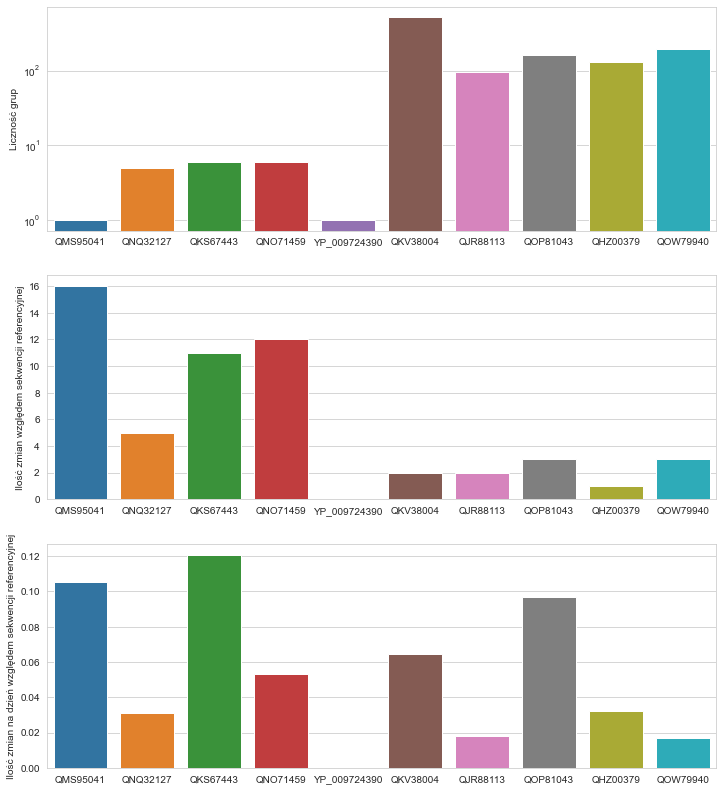

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
f, axs = plt.subplots(3,1,figsize=(12,14))
sns.barplot(x=chosen.index, y=[len(g) for g in groups], alpha=1, ax=axs[0])
axs[0].set(ylabel='Liczność grup')
axs[0].set_yscale('log')
sns.barplot(x=chosen.index, y=dif, alpha=1, ax=axs[1])
axs[1].set(ylabel='Ilość zmian względem sekwencji referencyjnej')
sns.barplot(x=chosen.index, y=np.array(dif)/np.array(days), alpha=1, ax=axs[2])
axs[2].set(ylabel='Ilość zmian na dzień względem sekwencji referencyjnej')
for ax in axs:
    ax.xaxis.grid(False)
    ax.set(xlabel=None)
f.savefig('groups.svg', bbox_inches='tight')
plt.show()